### Part 3: Downstream Global Health Analysis
#### Q1: Research question (2 pts). 

Among the following papers, identify a research question
they address that you could explore using the TweetsCOV19 dataset. For example, set out
to analyze sentiments towards Covid-19 as a function of time or geographical location, or of
any sub-topic related to the pandemic. Motivate the relevance of your question in the context
of the pandemic. Feel free to use another peer-reviewed paper analyzing COVID tweets for
public health insights for inspiration. Ensure to provide a correct citation.

Looking at the paper "COVID-19 Public Sentiment Insights and Machine Learning for Tweets Classification" by Jim Samuel et al. , we would like to analyze Tweet sentiments during the Covid-19 pandemic as a function of time. This topic is of great relevance both for politics and research in psychology. Both these fields seek to predict how crowds behave under certain stresses, such as fear, which is especially useful to understand for politicians in order to adapt or present decisions according to the current sentiment present for instance. Furthermore, such analyses might help to enhance predictive capabilities of institutions in order to adapt their communication in situations of hight alertness of crowds such that panicking or chaos may be prevented. 

#### Q2: Method choice and design
 Among the methods you have explored in Part 2,
select one approach to tackle this research question using the TweetsCOV19 dataset and
motivate your choice. Detail any necessary modifications you implement to achieve this
analysis and performance metrics to measure the success of your approach. Provide a code
snippet used to perform this analysis.


As the method of choice, in order to analyze the sentiment of the Tweets we would like to use the VADER sentiment analysis tool. This tool is specifically designed to analyze social media texts and is therefore well suited for our task. Furthermore, we already used this tool and had good experiences with it in the previous questions in terms of that sentiment analysis was performed well. Additionally, one can point out that the VADER tool is already fimiliar with a large corpus of social media texts, which is why it is not necessary to train the model on our dataset. What is more, VADER provides robust classification results irrespective of the length of the text, which is why it is well suited for our task and nearly no pre-processing needs to be done beforehand.

In the following you can see the code snippet used to perform the necessary modifications and the sentiment analysis on the TweetsCOV19 dataset. 

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
raw_data= pd.read_csv('./data/TweetsCOV19.csv')

#Removal of NaN's
new_data = raw_data[raw_data['TweetText'].notna()]
text_data = new_data['TweetText']

C:\Users\chris\AppData\Local\Temp\ipykernel_20072\4260082755.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data= pd.read_csv('./data/TweetsCOV19.csv')


How to measure the success of our approach?

In [5]:
#Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
sentiment = text_data.apply(lambda x: analyzer.polarity_scores(x))
sentiment_df = pd.DataFrame(sentiment.tolist())





In [6]:
# look at sentiment_df
sentiment_df.head(10)

,neg,neu,pos,compound
0,0.000,0.828,0.172,0.4019
1,0.092,0.795,0.113,0.1280
2,0.000,0.872,0.128,0.4215
3,0.111,0.889,0.000,-0.3612
4,0.000,1.000,0.000,0.0000
5,0.000,0.887,0.113,0.4199
6,0.191,0.667,0.142,-0.0258
7,0.237,0.763,0.000,-0.6808
8,0.070,0.704,0.226,0.6369
9,0.000,1.000,0.000,0.0000


In [7]:
# add corresponding tweet 
sentiment_df['TweetText'] = text_data.values


In [8]:
sentiment_df.head(10)

,neg,neu,pos,compound,TweetText
0,0.000,0.828,0.172,0.4019,From my blog: Californians support vaccine law...
1,0.092,0.795,0.113,0.1280,Secretary of State should recall Stormont next...
2,0.000,0.872,0.128,0.4215,"While serving in Afghanistan in 2010, Marine C..."
3,0.111,0.889,0.000,-0.3612,witch vixen season starts tomorrow. you all sh...
4,0.000,1.000,0.000,0.0000,"CGTN on the scene: \n\nAround 15,000 troops, 3..."
5,0.000,0.887,0.113,0.4199,Looking like it may be a fall-like weekend com...
6,0.191,0.667,0.142,-0.0258,i stopped caring what niggas think when i real...
7,0.237,0.763,0.000,-0.6808,#LIVE: Chaos expected on Oct 1 across Hong Kon...
8,0.070,0.704,0.226,0.6369,I hold @kie_vs_theworld personally responsible...
9,0.000,1.000,0.000,0.0000,@FuckITripped Exactly


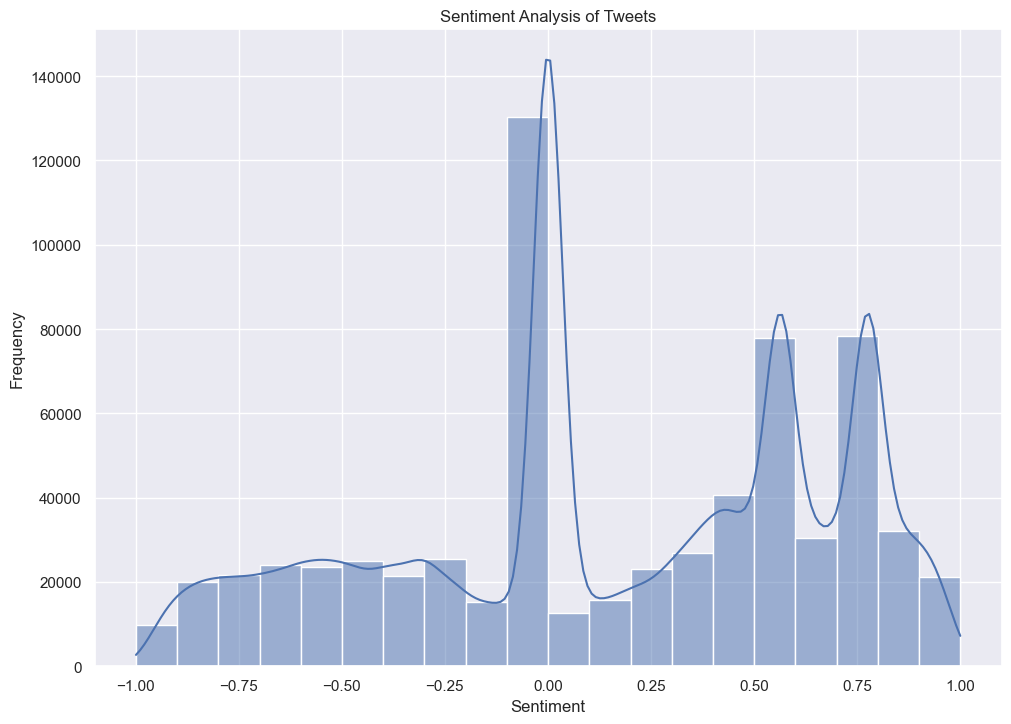

In [10]:
#visualize the sentiment
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(sentiment_df['compound'], bins=20, kde=True)
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [11]:
# add date column
sentiment_df['TweetDate'] = new_data['Timestamp'].values

In [12]:
# save to csv
sentiment_df.to_csv('./data/sentiment.csv', index=False)

In [57]:
# load sentiment_df
sentiment_df = pd.read_csv('./data/sentiment.csv')
sentiment_df.head(10)

,neg,neu,pos,compound,TweetText,TweetDate
0,0.000,0.828,0.172,0.4019,From my blog: Californians support vaccine law...,2019-09-30 22:06:21+00:00
1,0.092,0.795,0.113,0.1280,Secretary of State should recall Stormont next...,2019-09-30 22:26:32+00:00
2,0.000,0.872,0.128,0.4215,"While serving in Afghanistan in 2010, Marine C...",2019-09-30 23:00:00+00:00
3,0.111,0.889,0.000,-0.3612,witch vixen season starts tomorrow. you all sh...,2019-09-30 23:02:13+00:00
4,0.000,1.000,0.000,0.0000,"CGTN on the scene: \n\nAround 15,000 troops, 3...",2019-09-30 23:12:24+00:00
5,0.000,0.887,0.113,0.4199,Looking like it may be a fall-like weekend com...,2019-09-30 23:45:11+00:00
6,0.191,0.667,0.142,-0.0258,i stopped caring what niggas think when i real...,2019-09-30 23:56:25+00:00
7,0.237,0.763,0.000,-0.6808,#LIVE: Chaos expected on Oct 1 across Hong Kon...,2019-10-01 00:09:26+00:00
8,0.070,0.704,0.226,0.6369,I hold @kie_vs_theworld personally responsible...,2019-10-01 00:15:06+00:00
9,0.000,1.000,0.000,0.0000,@FuckITripped Exactly,2019-10-01 00:46:14+00:00


<Axes: title={'center': 'Sentiment Analysis of TweetsCOV19 Dataset'}, xlabel='TweetDate'>

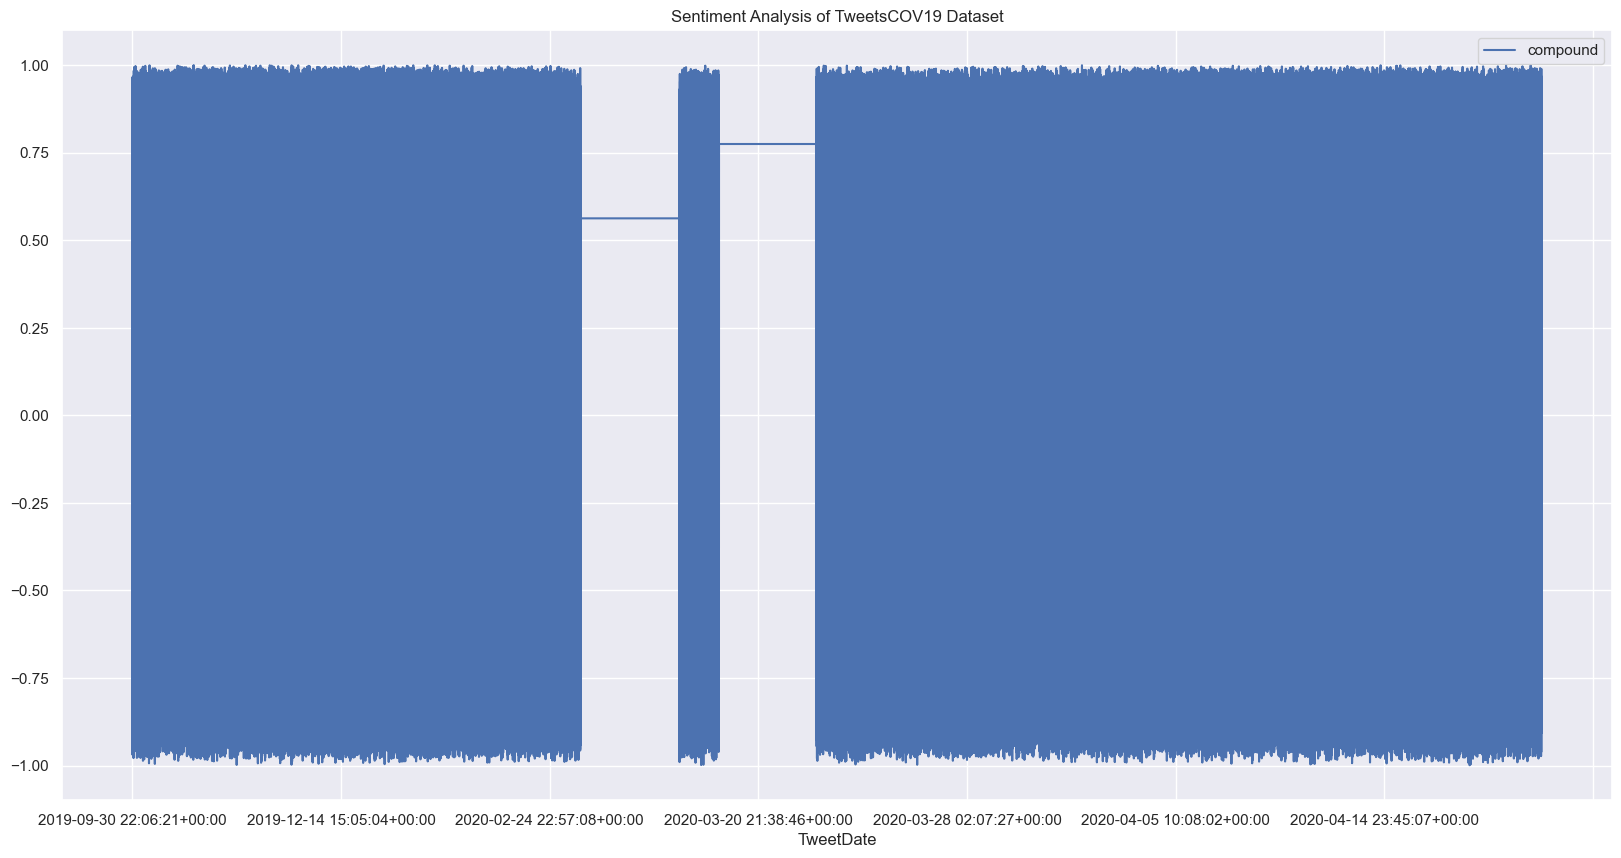

In [13]:
# visualize sentiment
sentiment_df.plot(x='TweetDate', y='compound', figsize=(20,10), title='Sentiment Analysis of TweetsCOV19 Dataset')


In [58]:
# aggregate setniment by date
sentiment_df['TweetDate'] = pd.to_datetime(sentiment_df['TweetDate'])
sentiment_df = sentiment_df.set_index('TweetDate')

# remove date time from index
sentiment_df.index = sentiment_df.index.date



In [59]:

sentiment_df.head(10)

,neg,neu,pos,compound,TweetText
2019-09-30,0.000,0.828,0.172,0.4019,From my blog: Californians support vaccine law...
2019-09-30,0.092,0.795,0.113,0.1280,Secretary of State should recall Stormont next...
2019-09-30,0.000,0.872,0.128,0.4215,"While serving in Afghanistan in 2010, Marine C..."
2019-09-30,0.111,0.889,0.000,-0.3612,witch vixen season starts tomorrow. you all sh...
2019-09-30,0.000,1.000,0.000,0.0000,"CGTN on the scene: \n\nAround 15,000 troops, 3..."
2019-09-30,0.000,0.887,0.113,0.4199,Looking like it may be a fall-like weekend com...
2019-09-30,0.191,0.667,0.142,-0.0258,i stopped caring what niggas think when i real...
2019-10-01,0.237,0.763,0.000,-0.6808,#LIVE: Chaos expected on Oct 1 across Hong Kon...
2019-10-01,0.070,0.704,0.226,0.6369,I hold @kie_vs_theworld personally responsible...
2019-10-01,0.000,1.000,0.000,0.0000,@FuckITripped Exactly


In [60]:
# group by index
sentiment_df = sentiment_df.groupby(sentiment_df.index)



In [61]:
sentiment_df.head(10)

,neg,neu,pos,compound,TweetText
2019-09-30,0.000,0.828,0.172,0.4019,From my blog: Californians support vaccine law...
2019-09-30,0.092,0.795,0.113,0.1280,Secretary of State should recall Stormont next...
2019-09-30,0.000,0.872,0.128,0.4215,"While serving in Afghanistan in 2010, Marine C..."
2019-09-30,0.111,0.889,0.000,-0.3612,witch vixen season starts tomorrow. you all sh...
2019-09-30,0.000,1.000,0.000,0.0000,"CGTN on the scene: \n\nAround 15,000 troops, 3..."
...,...,...,...,...,...
2020-05-23,0.000,0.888,0.112,0.3382,Simple Ways to Create Curb Appeal #4 – Powerwa...
2020-05-08,0.000,0.851,0.149,0.2732,@KonnorFulk Agreed. If it wasn't for Coronavir...
2020-05-23,0.000,0.829,0.171,0.4767,"@ntvuganda Let them appeal to OPM, they can be..."
2020-05-23,0.000,0.833,0.167,0.4588,#KapusoGiveMe5: Janine Gutierrez remains grate...


In [ ]:
sentiment_df = sentiment_df.resample('D').mean()
sentiment_df = sentiment_df.reset_index()

In [ ]:
sentiment_df['TweetDate'] = sentiment_df['TweetDate'].dt.date

In [24]:
sentiment_df.head(10)

,neg,neu,pos,compound,TweetText
TweetDate,,,,,
2019-09-30 22:06:21+00:00,0.000,0.828,0.172,0.4019,From my blog: Californians support vaccine law...
2019-09-30 22:26:32+00:00,0.092,0.795,0.113,0.1280,Secretary of State should recall Stormont next...
2019-09-30 23:00:00+00:00,0.000,0.872,0.128,0.4215,"While serving in Afghanistan in 2010, Marine C..."
2019-09-30 23:02:13+00:00,0.111,0.889,0.000,-0.3612,witch vixen season starts tomorrow. you all sh...
2019-09-30 23:12:24+00:00,0.000,1.000,0.000,0.0000,"CGTN on the scene: \n\nAround 15,000 troops, 3..."
2019-09-30 23:45:11+00:00,0.000,0.887,0.113,0.4199,Looking like it may be a fall-like weekend com...
2019-09-30 23:56:25+00:00,0.191,0.667,0.142,-0.0258,i stopped caring what niggas think when i real...
2019-10-01 00:09:26+00:00,0.237,0.763,0.000,-0.6808,#LIVE: Chaos expected on Oct 1 across Hong Kon...
2019-10-01 00:15:06+00:00,0.070,0.704,0.226,0.6369,I hold @kie_vs_theworld personally responsible...
